In [2]:
import pandas as pd 
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns
from adjustText import adjust_text
plt.style.use('seaborn')
%matplotlib inline

In [4]:
df = pd.read_csv('all_data_exercise_5.csv')
df.head()

,station_id,val,altitude,latitude,longitude,name,state
0,216,322.7,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen
1,389,335.8,436,51.0148,8.4318,"Berleburg, Bad-Arfeld",Nordrhein-Westfalen
2,390,378.5,610,50.9837,8.3683,"Berleburg, Bad-Stünzel",Nordrhein-Westfalen
3,613,395.1,206,51.5677,9.2324,Borgentreich,Nordrhein-Westfalen
4,644,387.6,150,51.7049,9.1738,Brakel,Nordrhein-Westfalen


In [5]:
val = df['val']
altitude = df['altitude']
station = df['station_id'].astype(str)
type(station)

pandas.core.series.Series

In [16]:
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(val, altitude)
print(slope, intercept, r_value, p_value, std_err)
r_value_square = r_value * r_value
print(r_value_square)

1.5368030713200582 -254.26201168347865 0.42557699649189196 0.013542970279212729 0.5869086074718232
0.18111577994305983


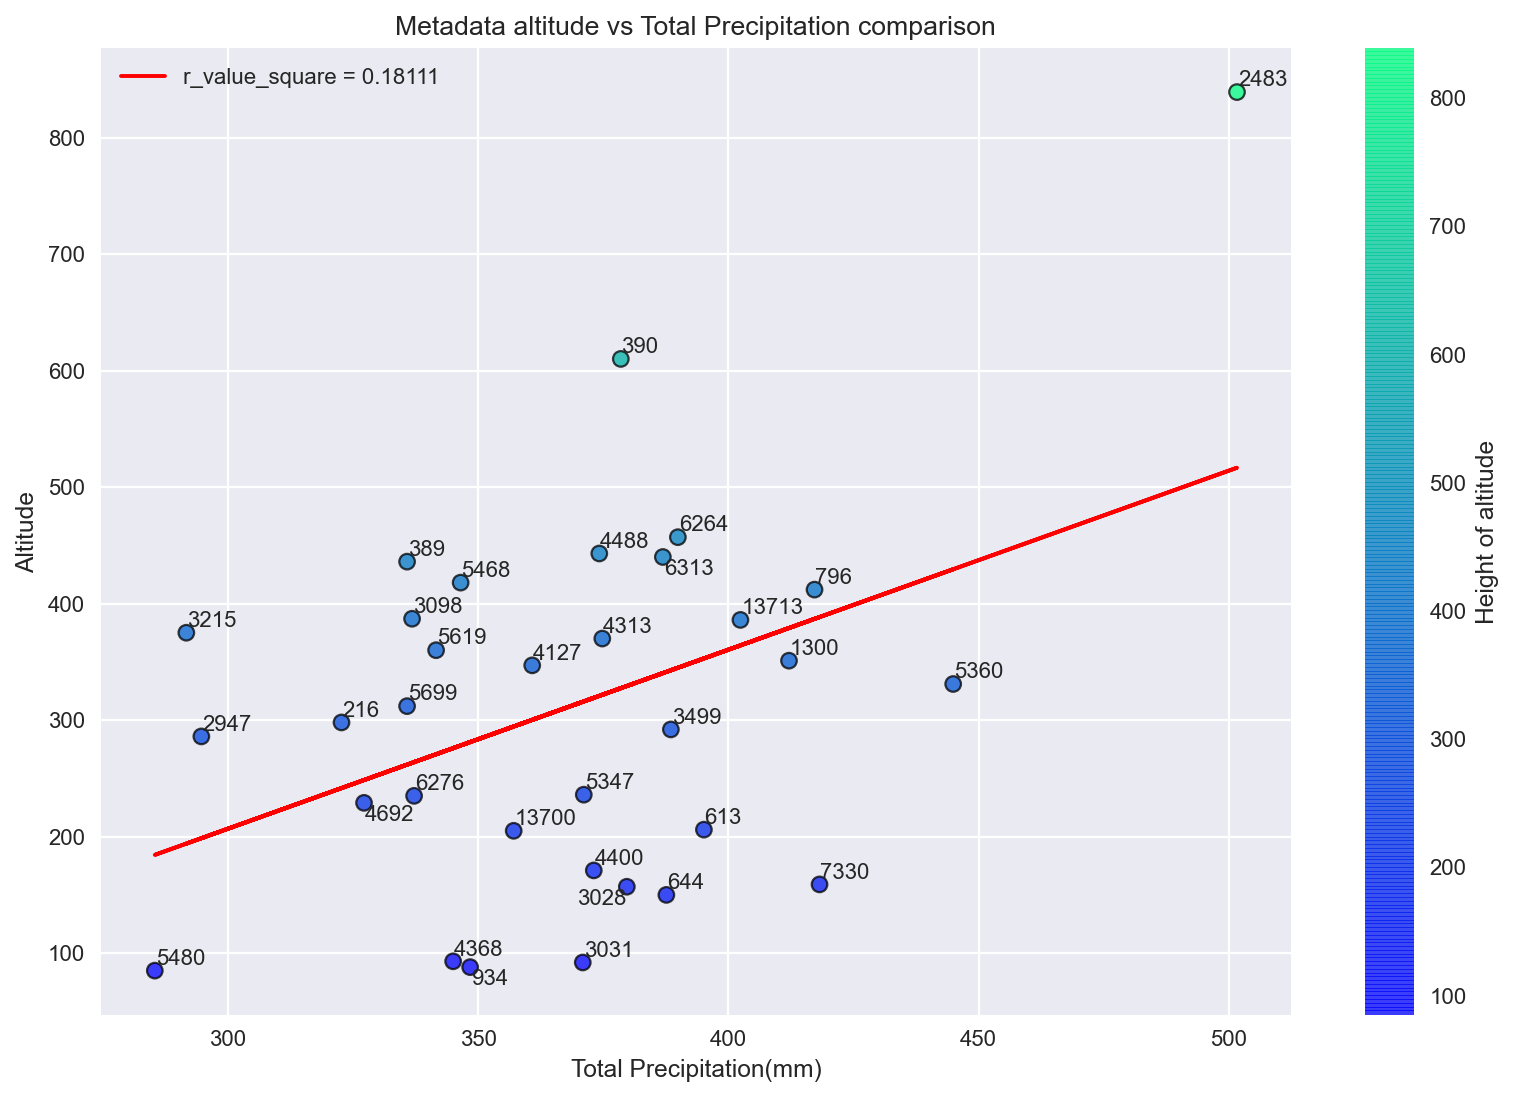

In [20]:
fig = plt.figure(dpi = 160, figsize = (12, 8), clear = True)
plt.xlabel("Total Precipitation(mm)")
plt.ylabel("Altitude")
plt.scatter(val, altitude, c = altitude, cmap = 'winter',  edgecolor = 'black', linewidth = 1, alpha = 0.75)
cbar = plt.colorbar()
cbar.set_label("Height of altitude")

m, b = np.polyfit(val, altitude, 1)
plt.plot(val, m*val+b, color='red', label = "r_value_square = 0.18111")

#for i, txt in enumerate(station):
    #plt.annotate(txt, (val[i], altitude[i]), size=9)
    
texts = [plt.text(val[i], altitude[i], '%s' %txt) for  i, txt in enumerate(station) ]
adjust_text(texts)

plt.title("Metadata altitude vs Total Precipitation comparison")

plt.legend(loc="upper left")

fig.savefig('scatter_plot.png')
plt.show()

In [8]:
df1 = pd.read_csv("staion_with_dtm_altitude.csv")
df1.head()

,station_id,val,altitude,latitude,longitude,name,state,dtm_altitude_1
0,216,322.7,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen,298.100006
1,389,335.8,436,51.0148,8.4318,"Berleburg, Bad-Arfeld",Nordrhein-Westfalen,433.500000
2,390,378.5,610,50.9837,8.3683,"Berleburg, Bad-St�nzel",Nordrhein-Westfalen,612.200012
3,613,395.1,206,51.5677,9.2324,Borgentreich,Nordrhein-Westfalen,205.000000
4,644,387.6,150,51.7049,9.1738,Brakel,Nordrhein-Westfalen,150.199997


In [9]:
alt = df1['altitude']
dtm= df1['dtm_altitude_1']
labels = df1['station_id']

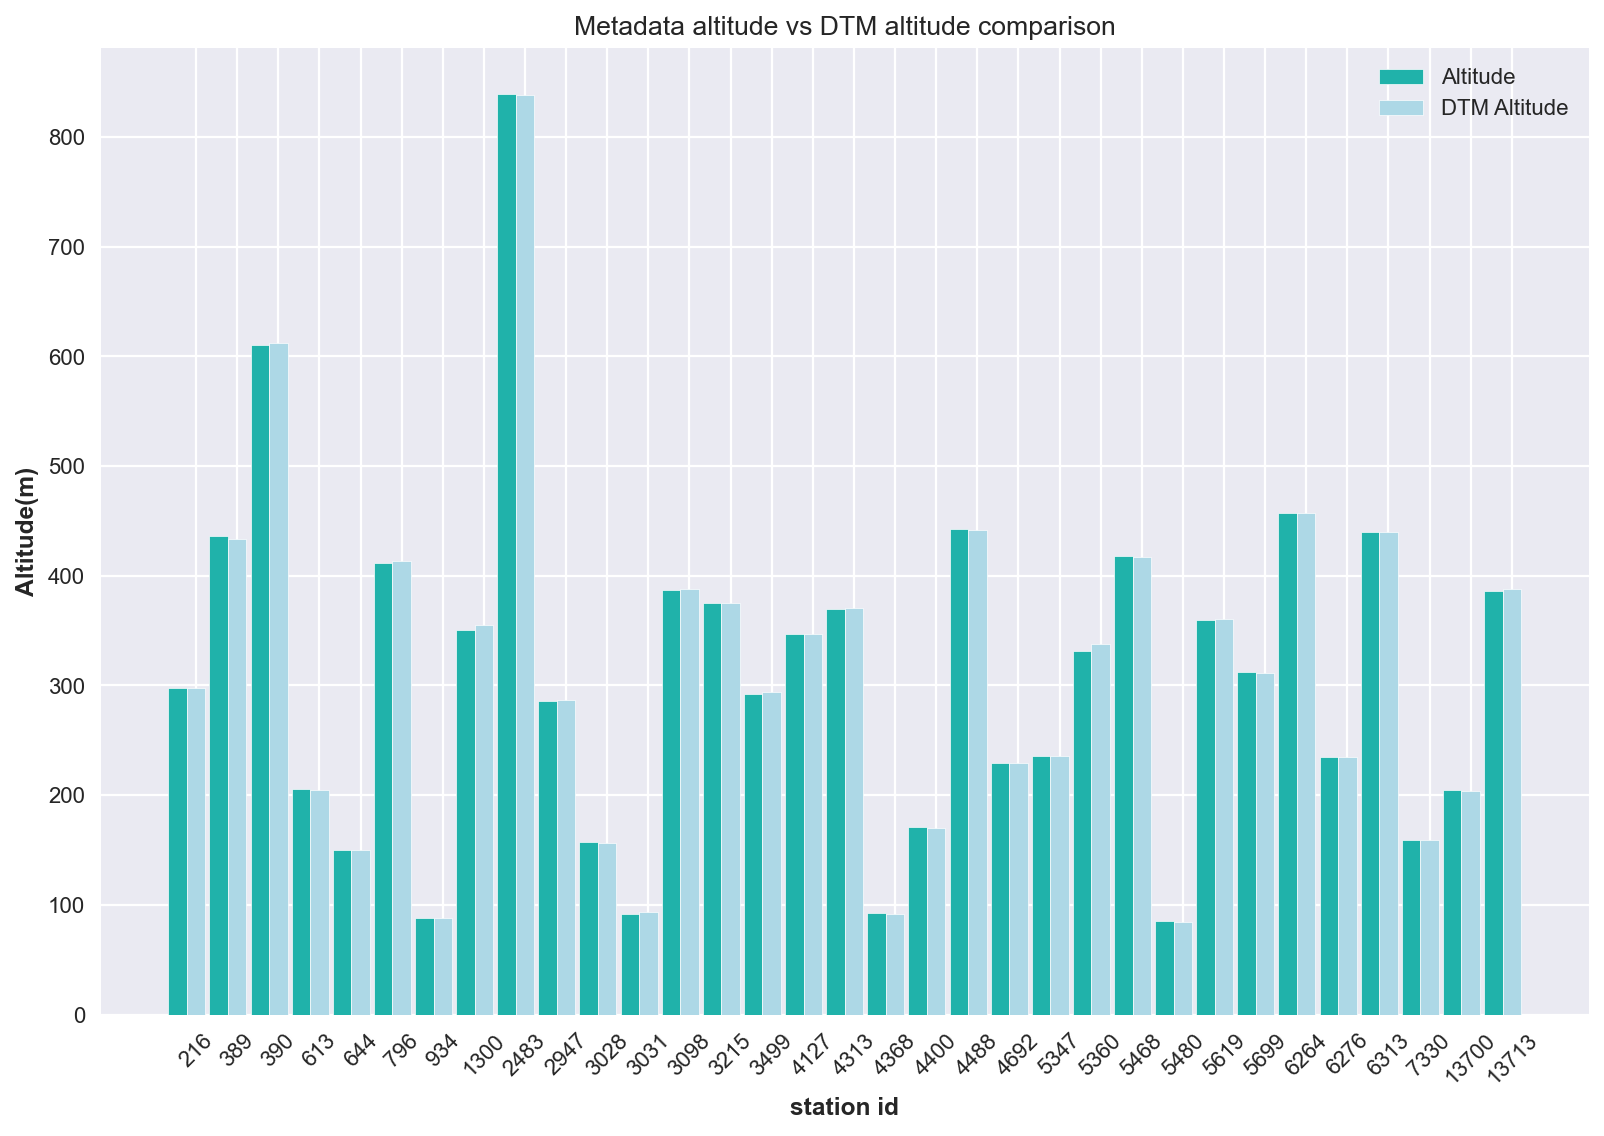

In [10]:
fig = plt.figure(dpi = 160, figsize = (12, 8), clear = True)
# set width of bars
barWidth = 0.45
 
# set heights of bars
 
# Set position of bar on X axis
r1 = np.arange(len(alt))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, alt, color='lightseagreen', width=barWidth, edgecolor='white', label='Altitude')
plt.bar(r2, dtm, color='lightblue', width=barWidth, edgecolor='white', label='DTM Altitude')
 
# Add xticks on the middle of the group bars
plt.xlabel('station id', fontweight='bold')
plt.ylabel('Altitude(m)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(alt))], labels, rotation= 45)
plt.title("Metadata altitude vs DTM altitude comparison")
 
# Create legend & Show graphic
plt.legend()
fig.savefig('altitude_vs_dtm_barchart.png')
plt.show()